<a href="https://colab.research.google.com/github/tdbartolo/tdbartolo-rep/blob/main/PNL_transformer_dataset_restaurante_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalando dependências
! pip install transformers[torch] datasets evaluate scikit-learn matplotlib #pip install dataset instala biblioteca do hugging face

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.1 MB/s eta 0:00:00


In [103]:
# carregando dados do HF
from datasets import load_dataset
#from sklearn.model_selection import train_test_split

url_test = "https://raw.githubusercontent.com/tdbartolo/tdbartolo-rep/main/test.csv"
url_train = "https://raw.githubusercontent.com/tdbartolo/tdbartolo-rep/main/train.csv"
#url = "https://raw.githubusercontent.com/tdbartolo/tdbartolo-rep/main/reviews.csv"

#dataset = load_dataset('csv', data_files={'train': 'train_small.csv', 'test': 'test_small.csv'}, column_names=['Review Text', 'Review', 'Recommends'], skiprows=[0])
#dataset = load_dataset('csv', data_files=url, column_names=['Review Text', 'Review', 'Recommends'], skiprows=[0])
dataset = load_dataset('csv', data_files={'train': url_train, 'test': url_test}, column_names=['Review Text', 'Review', 'Recommends'], skiprows=[0])

# Dividir o conjunto de dados em treinamento e teste
#train_dataset, test_dataset = train_test_split(dataset['train'], test_size=0.2, random_state=42)
dataset = dataset.class_encode_column(column="Review") # precisa pro trainer saber qual a coluna precisa aprender a predizer



  0%|          | 0/2 [00:00<?, ?it/s]

In [104]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Review Text', 'Review', 'Recommends'],
        num_rows: 13276
    })
    test: Dataset({
        features: ['Review Text', 'Review', 'Recommends'],
        num_rows: 3321
    })
})

In [105]:
dataset["train"] = dataset["train"].remove_columns("Recommends")
dataset["test"] = dataset["test"].remove_columns("Recommends")
dataset["train"] = dataset["train"].rename_column("Review Text","text")
dataset["train"] = dataset["train"].rename_column("Review","label")
dataset["test"] = dataset["test"].rename_column("Review Text","text")
dataset["test"] = dataset["test"].rename_column("Review","label")


In [106]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 13276
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3321
    })
})

In [107]:
import pandas as pd
from datasets import Dataset, DatasetDict

# Converter o dataset para um DataFrame pandas
df_train = dataset["train"].to_pandas()
df_test = dataset["test"].to_pandas()

# Remover as linhas com valores de 'Review' vazios ou None
df_train = df_train.dropna()
df_test = df_test.dropna()

df_train['label'] = df_train['label'].astype('int64')
df_test['label'] = df_test['label'].astype('int64')

df_train.loc[:, "text"] = df_train["text"].str.encode("ascii", "ignore").str.decode("utf-8")
df_test.loc[:, "text"] = df_test["text"].str.encode("ascii", "ignore").str.decode("utf-8")

# Converter o DataFrame de volta para o formato de Dataset
dataset["train"] = Dataset.from_pandas(df_train)
dataset["test"] = Dataset.from_pandas(df_test)

<ipython-input-107-978496f108b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['label'] = df_train['label'].astype('int64')
<ipython-input-107-978496f108b9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label'] = df_test['label'].astype('int64')
<ipython-input-107-978496f108b9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [108]:
df_train["label"].dtype

dtype('int64')

In [109]:
#verifica quantos labels únicos temos
set(dataset["train"] ["label"])
#dataset["train"]

{0, 1, 2, 3, 4}

In [110]:
dataset["train"] = dataset["train"].remove_columns("__index_level_0__")
dataset["test"] = dataset["test"].remove_columns("__index_level_0__")

In [111]:
#mostra a quantidade de linhas do dataset no treino e  no teste
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 11802
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2876
    })
})

In [112]:
# gerando datasets menores para treino, validação e teste (para poupar tempo)
small_train_dataset = dataset["train"].shuffle(seed=42).select(range(1000)) # pega de 0 a 999 para o treino
small_dev_dataset = dataset["train"].shuffle(seed=42).select(range(1000,1500)) # pega os dados de 1.000 a 1.499 para validação
small_test_dataset = dataset["test"].shuffle(seed=42).select(range(500)) #pega 500 do teste

In [113]:
#visualização do dataset
import pandas as pd

small_train_labels = small_train_dataset["label"]
small_train_texts = small_train_dataset["text"]

# Criar DataFrames para os conjuntos menores de dados
small_train_df = pd.DataFrame({'label': small_train_labels, 'text': small_train_texts})

small_train_df.head(10)

,label,text
0,4,Chicken chap and luchi... Awsm taste...with an...
1,4,One of my favourite..I just loved the decorati...
2,4,"Undoubtedly,one of the best place for pizza,pa..."
3,4,Taste of the foods were phenomenal the steak w...
4,0,Hidden camera in girls washroom. Everyone boyc...
5,1,", , ? , , ..."
6,2,"Average,, not good at all..quantity and qualit..."
7,3,It's wallah and delicious... Keep up this fabu...
8,4,osmmmm place & also osmmm food I loved it ...
9,4,"Classy & delicious food menu , elegant space t..."


In [114]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# carregando modelo BERT pré-treinado e o tokenizer do modelo pré-treinado

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

In [115]:
#chama a função tokenized e aplica em cada linha do texto
#método map passa uma função em todo o dataset
#o toquenizador criou input_ids', 'token_type_ids', 'attention_mask'

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_small_train_dataset = small_train_dataset.map(tokenize_function, batched=True)
tokenized_small_dev_dataset = small_dev_dataset.map(tokenize_function, batched=True)
tokenized_small_test_dataset = small_test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [116]:
tokenized_small_train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1000
})

In [117]:
#visualização do dataset
import pandas as pd

#small_train_labels = small_train_dataset["Review"]
#small_train_texts = small_train_dataset["Review Text"]

# Criar DataFrames para os conjuntos menores de dados
#small_train_df = pd.DataFrame({'Review': small_train_labels, 'Review Text': small_train_texts})
small_train_df = pd.DataFrame(tokenized_small_train_dataset)

small_train_df.head(10)

,text,label,input_ids,token_type_ids,attention_mask
0,Chicken chap and luchi... Awsm taste...with an...,4,"[101, 18770, 22572, 11478, 1105, 181, 16643, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,One of my favourite..I just loved the decorati...,4,"[101, 1448, 1104, 1139, 9122, 119, 119, 146, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"Undoubtedly,one of the best place for pizza,pa...",4,"[101, 12118, 2572, 10354, 1906, 1193, 117, 114...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Taste of the foods were phenomenal the steak w...,4,"[101, 27589, 1104, 1103, 11785, 1127, 14343, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,Hidden camera in girls washroom. Everyone boyc...,0,"[101, 19595, 4504, 1107, 2636, 10124, 6077, 11...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
5,", , ? , , ...",1,"[101, 117, 117, 136, 117, 117, 117, 119, 119, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
6,"Average,, not good at all..quantity and qualit...",2,"[101, 18098, 117, 117, 1136, 1363, 1120, 1155,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
7,It's wallah and delicious... Keep up this fabu...,3,"[101, 1135, 112, 188, 2095, 3354, 1105, 13108,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
8,osmmmm place & also osmmm food I loved it ...,4,"[101, 184, 6602, 6262, 1306, 1282, 111, 1145, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
9,"Classy & delicious food menu , elegant space t...",4,"[101, 3699, 1183, 111, 13108, 2094, 13171, 117...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [21]:
#ver o dado toquenizado
#tokenized_small_train_dataset [0]


In [118]:
from transformers import Trainer, TrainingArguments
import numpy as np
import evaluate #biblioteca para carregar métrica

metric = evaluate.load("accuracy")

#cria uma função para computar a métrica
def compute_metrics(eval_pred): #eval_pred é o que o modelo previu
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1) #pega o id que tem maior probabilidade
    return metric.compute(predictions=predictions, references=labels) #compara o ID predito com o label esperado

#onde vai salvar o modelo treinado
MODEL_PATH = "modelo_aula_bert_2"

training_args = TrainingArguments(
    output_dir=MODEL_PATH,
    evaluation_strategy="steps", #fazer o evaluation no step de validação a cada 10 steps
    eval_steps=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=4, # gradient_accumulation_steps* per_device_eval_batch_size=batch
    max_steps=200,  #por quantos steps eu quero treinar o modelo
    learning_rate=3e-5,
    logging_strategy="steps", #a cada 10 steps vai printar
    logging_steps=10,
    save_steps=50, #salvar check point a cada 50 steps
    load_best_model_at_end=True, #pega o melhor dos que salvou
    metric_for_best_model="accuracy",
    greater_is_better=True, #se for maior é bom pq acurácia é medida de acerto
    save_total_limit=2, #quantos checkpoints vai salvar
    disable_tqdm=False #aparece a barrinha carregando
)
#entra com o modelo definido acima, os argumentos e os datasets, o trainer espera a função que computa a métrica
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_small_train_dataset,
    eval_dataset=tokenized_small_dev_dataset,
    compute_metrics=compute_metrics,
)

# Nova seção

In [ ]:
#treina o modelo
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
10,1.430300,1.219785,0.574000
20,1.071100,1.212394,0.574000
30,1.212200,1.079044,0.574000
40,1.014300,0.947382,0.636000
50,0.876500,0.892001,0.722000


In [ ]:
#verifica se loss está muito ruidoso (sobe e desce) que o learning rate pode estar muito alto ou o dado estar ruim
import pandas as pd

df_log = pd.DataFrame(trainer.state.log_history)
df_log

,loss,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,1.6271,0.000028,0.32,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.32,10,1.574612,0.284,16.9966,29.418,3.707,NaN,NaN,NaN,NaN,NaN
2,1.5845,0.000027,0.64,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.64,20,1.510316,0.376,17.3113,28.883,3.639,NaN,NaN,NaN,NaN,NaN
4,1.5026,0.000025,0.96,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.96,30,1.414893,0.418,17.3798,28.769,3.625,NaN,NaN,NaN,NaN,NaN
6,1.3383,0.000024,1.28,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.28,40,1.305822,0.526,17.0613,29.306,3.693,NaN,NaN,NaN,NaN,NaN
8,1.2741,0.000023,1.60,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1.60,50,1.204005,0.492,16.7065,29.928,3.771,NaN,NaN,NaN,NaN,NaN


<Axes: >

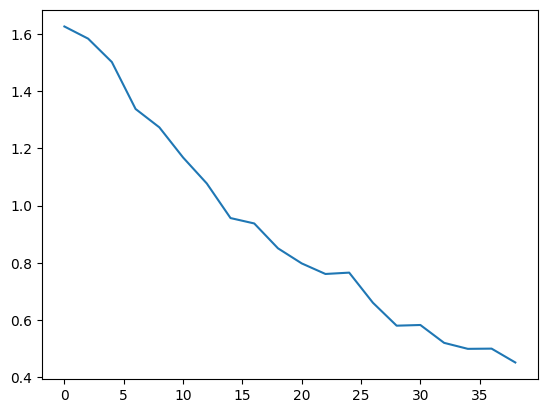

In [ ]:
df_log["loss"].dropna().plot()

<Axes: >

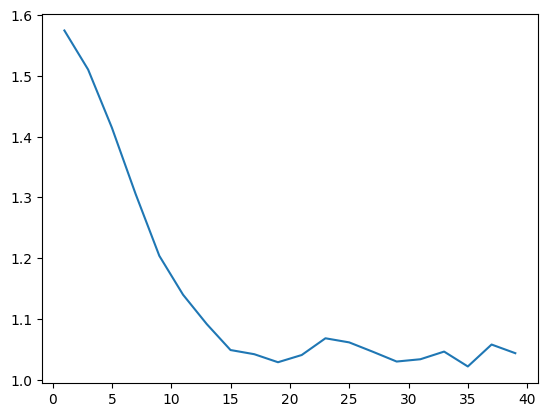

In [ ]:
#se o eval_loss desce muito e depois sobe é sinal de overfitting
df_log["eval_loss"].dropna().plot()

<Axes: >

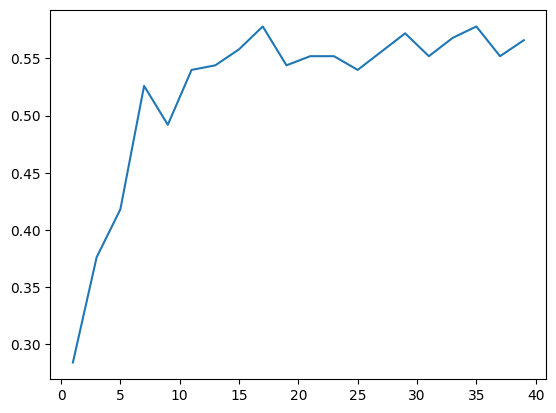

In [ ]:
df_log["eval_accuracy"].dropna().plot()

In [ ]:
#roda o evaluate no teste para ver como o modelo vai se comportar
trainer.evaluate(tokenized_small_test_dataset)

{'eval_loss': 0.9899438619613647,
 'eval_accuracy': 0.568,
 'eval_runtime': 16.7385,
 'eval_samples_per_second': 29.871,
 'eval_steps_per_second': 3.764,
 'epoch': 6.4}

In [ ]:
#salva o modelo e o tokenizador
trainer.save_model(MODEL_PATH)
tokenizer.save_pretrained(MODEL_PATH)

('modelo_aula_bert_2/tokenizer_config.json',
 'modelo_aula_bert_2/special_tokens_map.json',
 'modelo_aula_bert_2/vocab.txt',
 'modelo_aula_bert_2/added_tokens.json',
 'modelo_aula_bert_2/tokenizer.json')

In [ ]:
import torch.nn.functional as F
import torch
#carrega o nosso modelo que salvamos no ambiente de execução do colab/podemos salvar no computador para não ter que treinar novamente
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH)
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
#text = "This is a really bad restaurant"
#text = "This is a really excellent restaurant, but the drink was hot"
text = "This is a really excellent restaurant"
encoded_input = tokenizer(text, return_tensors="pt")
output = model(**encoded_input) #carrega os parametros criados pelo tokenizador - input_ids, token_type_ids, attention_mask
probs = F.softmax(output.logits, dim=1) #carrega o softmax para colocar os valores entre 0 e 1 para facilitar a visualização
pred = torch.argmax(probs, dim=1)
print(probs)
pred

tensor([[0.0094, 0.0144, 0.0233, 0.1910, 0.7619]], grad_fn=<SoftmaxBackward0>)


tensor([4])

In [ ]:
encoded_input

{'input_ids': tensor([[ 101, 1188, 1110,  170, 1541, 6548, 4382,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}